In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score 
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
taxis=sns.load_dataset("taxis")
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [15]:
taxis.shape

(6433, 14)

In [8]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [10]:
taxis.nunique()

pickup             6414
dropoff            6425
passengers            7
distance           1079
fare                220
tip                 489
tolls                16
total               898
color                 2
payment               2
pickup_zone         194
dropoff_zone        203
pickup_borough        4
dropoff_borough       5
dtype: int64

In [11]:
taxis.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [18]:
taxis=taxis.drop_duplicates()
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [19]:
taxis.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [20]:
taxis=taxis.drop(columns=['pickup', 'dropoff','pickup_borough', 'dropoff_borough','pickup_zone', 'dropoff_zone'])

In [21]:
taxis.head()

,passengers,distance,fare,tip,tolls,total,color,payment
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card


In [32]:
taxis.isna().sum()

passengers    0
distance      0
fare          0
tip           0
tolls         0
total         0
color         0
payment       0
dtype: int64

In [35]:

taxis['color'].unique()

array(['yellow', 'green'], dtype=object)

In [36]:
taxis['payment'].unique()

array(['credit card', 'cash'], dtype=object)

In [31]:
taxis['payment'].fillna(taxis['payment'].mode()[0],inplace=True)

C:\Users\vinot\AppData\Local\Temp\ipykernel_13316\1449500939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxis['payment'].fillna(taxis['payment'].mode()[0],inplace=True)


In [37]:
taxis['color']=taxis['color'].map({'yellow':1,'green':0})

In [40]:
taxis['payment']=taxis['payment'].map({'credit card':0, 'cash':1})

In [41]:
taxis.dtypes

passengers      int64
distance      float64
fare          float64
tip           float64
tolls         float64
total         float64
color           int64
payment         int64
dtype: object

In [42]:
taxis.head()

,passengers,distance,fare,tip,tolls,total,color,payment
0,1,1.60,7.0,2.15,0.0,12.95,1,0
1,1,0.79,5.0,0.00,0.0,9.30,1,1
2,1,1.37,7.5,2.36,0.0,14.16,1,0
3,1,7.70,27.0,6.15,0.0,36.95,1,0
4,3,2.16,9.0,1.10,0.0,13.40,1,0


In [43]:
taxis.describe()

,passengers,distance,fare,tip,tolls,total,color,payment
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,0.847350,0.281673
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570,0.359678,0.449850
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,0.000000,0.000000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,1.000000,0.000000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,1.000000,0.000000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,1.000000,1.000000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000,1.000000,1.000000


In [44]:
for col in taxis.columns:
    print(col)

passengers
distance
fare
tip
tolls
total
color
payment


<Axes: >

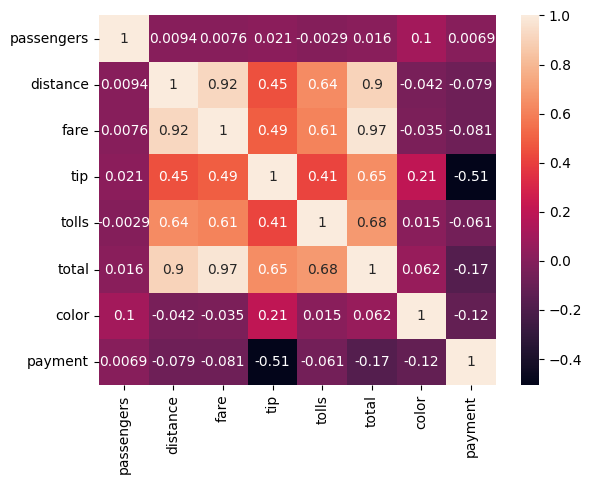

In [45]:
sns.heatmap(taxis.corr(),annot=True)

C:\Users\vinot\AppData\Local\Temp\ipykernel_13316\3096539034.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(taxis["total"])


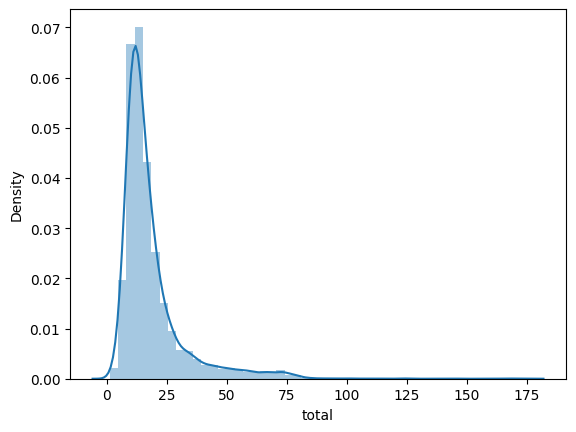

In [49]:

sns.distplot(taxis["total"])
plt.show()

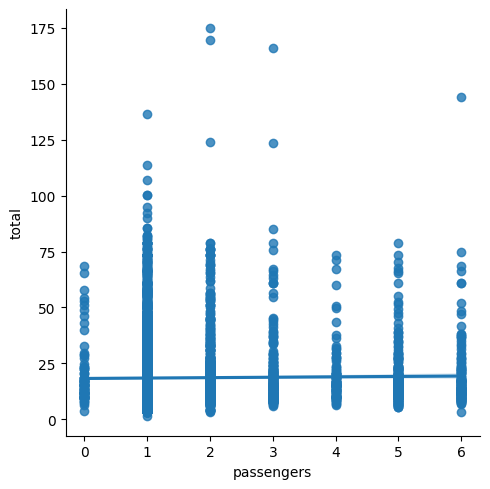

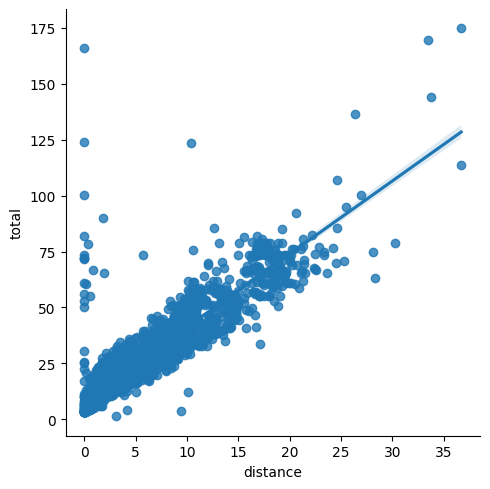

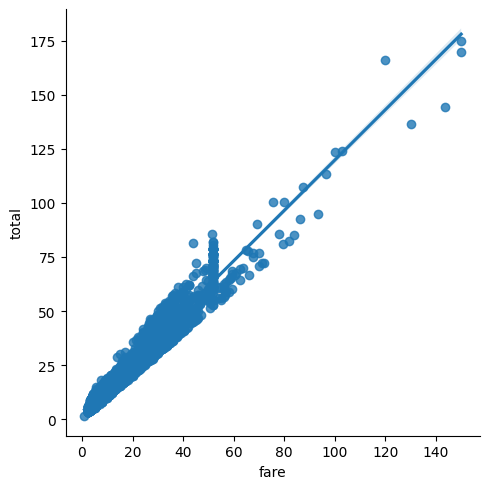

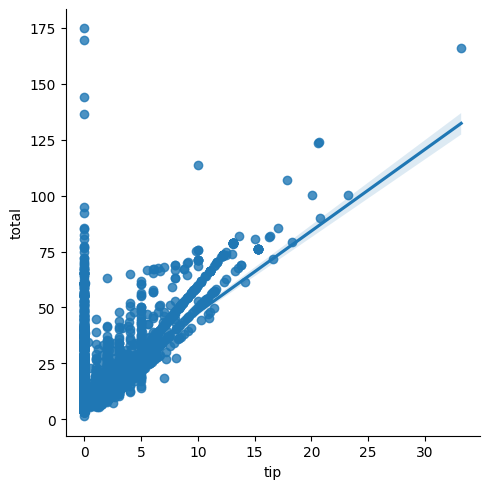

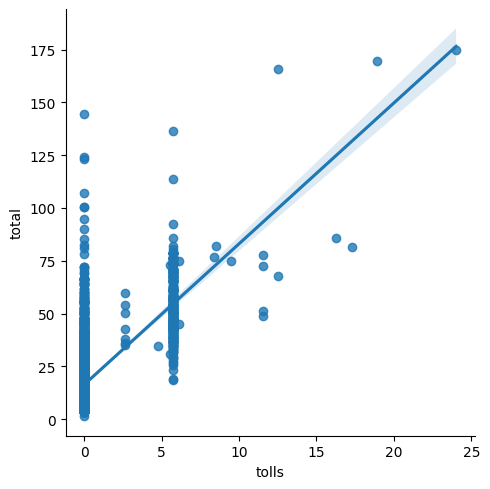

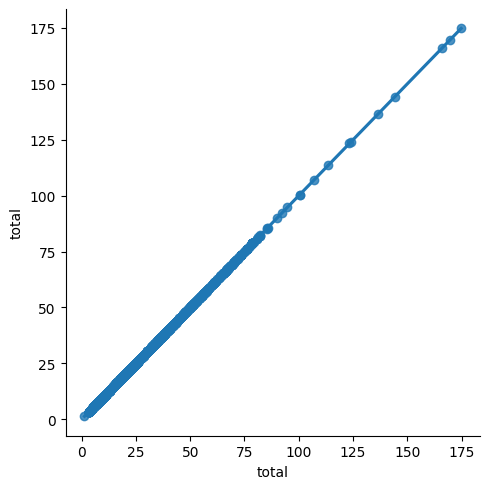

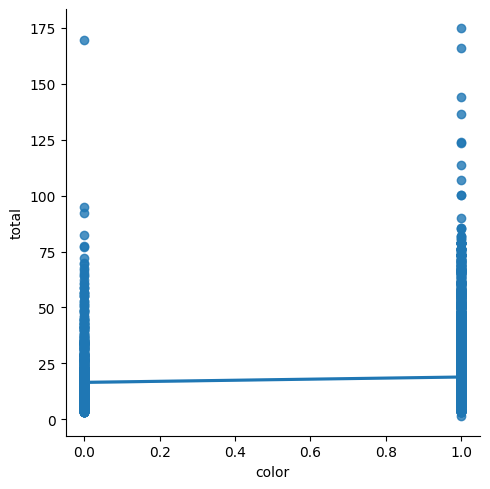

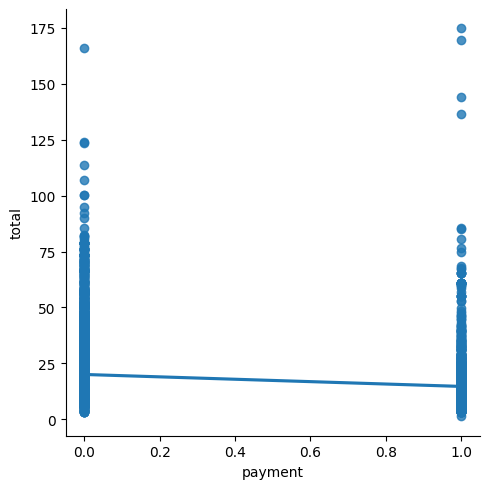

In [50]:
for col in taxis.columns:
    sns.lmplot(data=taxis,x=col,y='total')

In [51]:
taxis

,passengers,distance,fare,tip,tolls,total,color,payment
0,1,1.60,7.0,2.15,0.0,12.95,1,0
1,1,0.79,5.0,0.00,0.0,9.30,1,1
2,1,1.37,7.5,2.36,0.0,14.16,1,0
3,1,7.70,27.0,6.15,0.0,36.95,1,0
4,3,2.16,9.0,1.10,0.0,13.40,1,0
...,...,...,...,...,...,...,...,...
6428,1,0.75,4.5,1.06,0.0,6.36,0,0
6429,1,18.74,58.0,0.00,0.0,58.80,0,0
6430,1,4.14,16.0,0.00,0.0,17.30,0,1
6431,1,1.12,6.0,0.00,0.0,6.80,0,0


In [52]:
x=taxis.drop(labels="total",axis=1)

In [53]:
x

,passengers,distance,fare,tip,tolls,color,payment
0,1,1.60,7.0,2.15,0.0,1,0
1,1,0.79,5.0,0.00,0.0,1,1
2,1,1.37,7.5,2.36,0.0,1,0
3,1,7.70,27.0,6.15,0.0,1,0
4,3,2.16,9.0,1.10,0.0,1,0
...,...,...,...,...,...,...,...
6428,1,0.75,4.5,1.06,0.0,0,0
6429,1,18.74,58.0,0.00,0.0,0,0
6430,1,4.14,16.0,0.00,0.0,0,1
6431,1,1.12,6.0,0.00,0.0,0,0


In [54]:
y=taxis['total']

In [55]:
y

0       12.95
1        9.30
2       14.16
3       36.95
4       13.40
        ...  
6428     6.36
6429    58.80
6430    17.30
6431     6.80
6432    20.16
Name: total, Length: 6433, dtype: float64

In [57]:
model=LinearRegression()

In [58]:
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
model.intercept_

np.float64(1.5509023469867387)

In [62]:
model.coef_

array([0.00577109, 0.00943496, 0.97554626, 1.10162137, 1.00719257,
       1.91345085, 0.10366585])

In [63]:
y_pred=model.predict(x)

In [65]:
y_pred

array([12.68252998,  8.45897504, 13.39947355, ..., 17.30814013,
        7.42051813, 19.9276397 ], shape=(6433,))

In [66]:
mean_absolute_error(taxis["total"],y_pred)

0.5360349297387828

In [67]:
r2_score(taxis["total"],y_pred)

0.9963265208905837

In [69]:
error=y-y_pred

In [70]:
error

0       0.267470
1       0.841025
2       0.760526
3       0.292506
4      -0.093746
          ...   
6428   -0.761426
6429    0.484833
6430   -0.008140
6431   -0.620518
6432    0.232360
Name: total, Length: 6433, dtype: float64

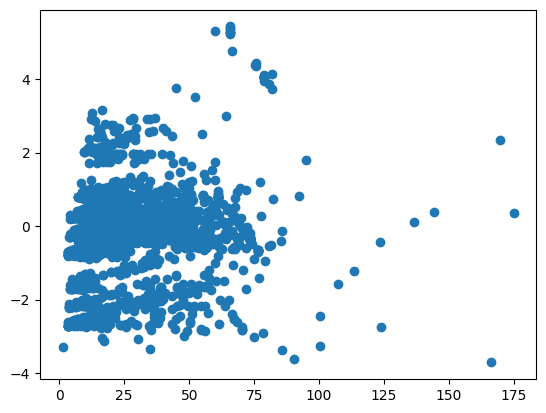

In [71]:
plt.scatter(x=taxis['total'],y=error)

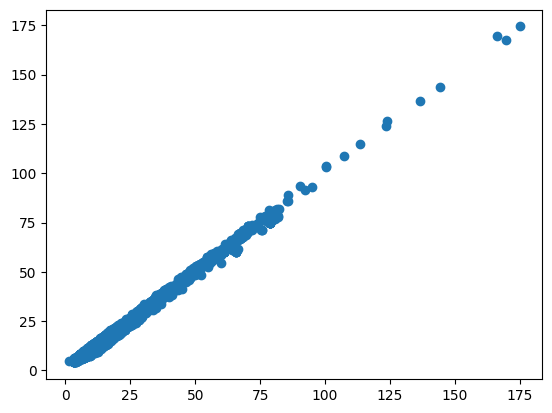

In [72]:
plt.scatter(x=y,y=y_pred)

In [75]:
model_1=smf.ols(formula="total~passengers+distance+fare+tip+tolls+color+payment",data=taxis).fit()

In [76]:
model_1

In [77]:
model_1.params

Intercept     1.550902
passengers    0.005771
distance      0.009435
fare          0.975546
tip           1.101621
tolls         1.007193
color         1.913451
payment       0.103666
dtype: float64

In [78]:
model_1.aic

np.float64(15987.196015907504)

In [79]:
model_1.bic

np.float64(16041.349586078792)

In [80]:
model_1.rsquared

np.float64(0.9963265208905837)

In [81]:
model_1.rsquared_adj

np.float64(0.9963225186565345)